# **Lab 3 - Metody kontekstowe**
---

## 1. Wprowadzenie

W metodach kontekstowych wartości piksela obrazu wyjściowego zależy nie tylko od wartości piksela o tych samych współrzędnych na obrazie wejściowym, ale także od punktów znajdujących się w jego otoczeniu (kontekst). 

Wczytanie niezbędnych pakietów

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import cv2

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 


main_dir = 'C:/Users/moko/OneDrive/Studia/MagisterkaINF/sem2/Wizja/LAB/ADOM/'

Dla uproszczenia składni wprowadzimy funkcje pomocnicze.

In [2]:
#FUNKCJE POMOCNICZE

# funkcja wyswietlająca obraz kolorowy lub w skali szarości
def pobr_cv2(obraz, tytul = '', osie = False, opencv = True):
    if not(osie):
        plt.axis("off") 
    if obraz.ndim == 2:
        plt.imshow(obraz,cmap='gray')
    else:
        if opencv:
            plt.imshow(cv2.cvtColor(obraz,cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(obraz)
    plt.title(tytul)

# funkcja wyświetlająca obrazy wg. listy
def pobr(listaobr, ile_k = 1, listatyt = [], opencv = True, wart_dpi = 100, osie = False):
    rozm_obr = 5
    ile = len(listaobr)
    if len(listatyt) == 0:
        listatyt = [' ']*ile
    ile_w = np.ceil(ile / ile_k).astype(int)
    figsize_k = rozm_obr*ile_k
    figsize_w = rozm_obr*ile_w
    plt.figure(figsize=(figsize_k,figsize_w), dpi = wart_dpi)
    for i in range(0,ile):
        if isinstance(listaobr[i],np.ndarray):
            plt.subplot(ile_w,ile_k,i+1)
            pobr_cv2(listaobr[i],listatyt[i],osie,opencv)
    plt.show()

## 2. Filtry liniowe dolnoprzepustowe

W filtrach kontekstowych liniowych, odpowiedź filtra jest kombinacją liniową punktów należących do otoczenia oraz współczynników maski.

Działanie filtrów dolnoprzepustowych polega na usuwaniu z obrazu punktów o wysokiej częstotliwości tj. znacząco różniących się od swojego otoczenia. Filtry te z jednej strony usuwają szum z obrazu, zaś z drugiej wprowadzają jego rozmycie.

Najprostszym filtrem liniowym rozmywającym jest filtr uśredniający, którego działanie polega na uśrednieniu wartości pikseli w otoczeniu o ustalonym rozmiarze. 

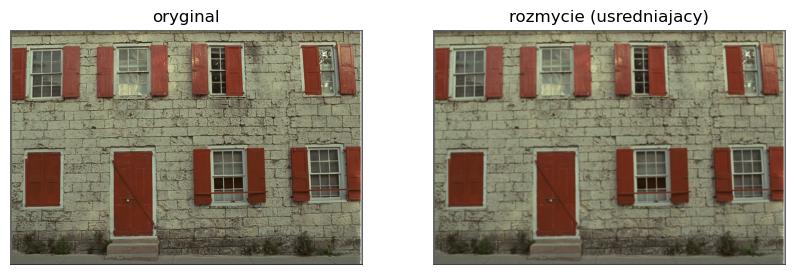

In [3]:
# filtr uśredniający
obr = cv2.imread(main_dir + 'kodim01.png')
sasiedztwo = 1
rozmiar_maski = sasiedztwo*2 + 1
wynik = cv2.blur(obr,(rozmiar_maski, rozmiar_maski))
pobr([obr,wynik],2,['oryginal','rozmycie (usredniajacy)'])

Przykład powyższy wykorzystuje funkcję realizującą filtrację z maską prostokątną o zadanynych rozmiarach, składająca się z elementów o takich samych wartościach. Identyczny filtr liniowy można także uzyskać używając do tego celu funkcję `filter2D` umożliwiającą uzyskanie maski o dowolnych elementach. 

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


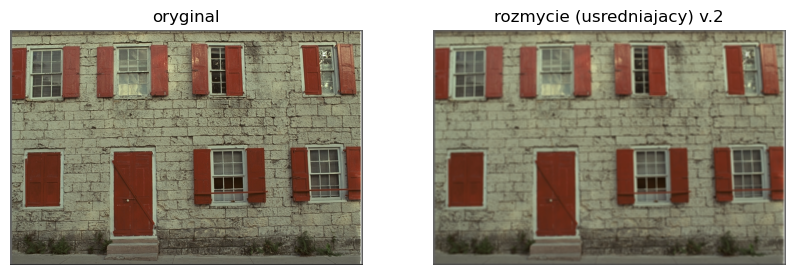

In [4]:
# przykład filtra uśredniającego
# wczytanie obrazu
obr = cv2.imread(main_dir+'kodim01.png')
# utworzenie maski filtru
sasiedztwo = 2
rozmiar_maski = sasiedztwo*2 + 1
maska = np.ones((rozmiar_maski,rozmiar_maski),np.float32)/(rozmiar_maski * rozmiar_maski)
print(maska)
# zastosowanie maski
wynik = cv2.filter2D(obr,-1,maska)
pobr([obr,wynik],2,['oryginal','rozmycie (usredniajacy) v.2'])

> **Zadanie** Co oznacza parametr `sasiedztwo`, a co `rozmiar_maski` ? Jaki jest ich wpływ na efekt końcowy ? Wykonaj stosowne eksperymenty.

W przypadku filtru uśredniającego klasyczengo wpływ wszystkich sąsiadów punktu centralnego oraz samego tego punktu na wartość piksela na obrazie wyjściowym jest taki sam. Jedną z alternatyw jest filtr w którym waga elementu centralnego jest inna niż punktów sąsiedztwa.

[[0.01587302 0.01587302 0.01587302 0.01587302 0.01587302 0.01587302
  0.01587302]
 [0.01587302 0.01587302 0.01587302 0.01587302 0.01587302 0.01587302
  0.01587302]
 [0.01587302 0.01587302 0.01587302 0.01587302 0.01587302 0.01587302
  0.01587302]
 [0.01587302 0.01587302 0.01587302 0.23809524 0.01587302 0.01587302
  0.01587302]
 [0.01587302 0.01587302 0.01587302 0.01587302 0.01587302 0.01587302
  0.01587302]
 [0.01587302 0.01587302 0.01587302 0.01587302 0.01587302 0.01587302
  0.01587302]
 [0.01587302 0.01587302 0.01587302 0.01587302 0.01587302 0.01587302
  0.01587302]]


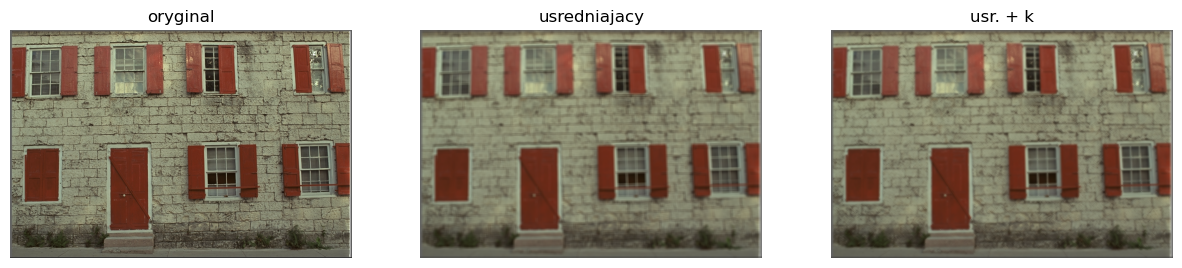

In [5]:
# przykład filtra uśredniającego
# wczytanie obrazu
obr = cv2.imread(main_dir+'kodim01.png')
# utworzenie maski filtru k jest wagą puntu centralnego
k = 15
sasiedztwo = 3
rozmiar_maski = sasiedztwo*2 + 1
maska = np.ones((rozmiar_maski, rozmiar_maski),np.float32)
maska0 = maska/sum(sum(maska))
maska[sasiedztwo, sasiedztwo] = k
maska = maska/sum(sum(maska))
print(maska)
# zastosowanie maski
wynik0 = cv2.filter2D(obr,-1,maska0)
wynik = cv2.filter2D(obr,-1,maska)
pobr([obr,wynik0,wynik],3,['oryginal', 'usredniajacy', 'usr. + k'])

In [6]:
maska0.shape

(7, 7)

> **Zadanie** Jak parametr `k` wpływa na efekt filtracji ? Wykonaj stosowne eksperymenty.

Ograniczenie rozmiaru maski do jednego tylko kierunku pozwala na uzyskanie efektu rozmycia kierunkowego typowego dla efektu poruszenia kamery.

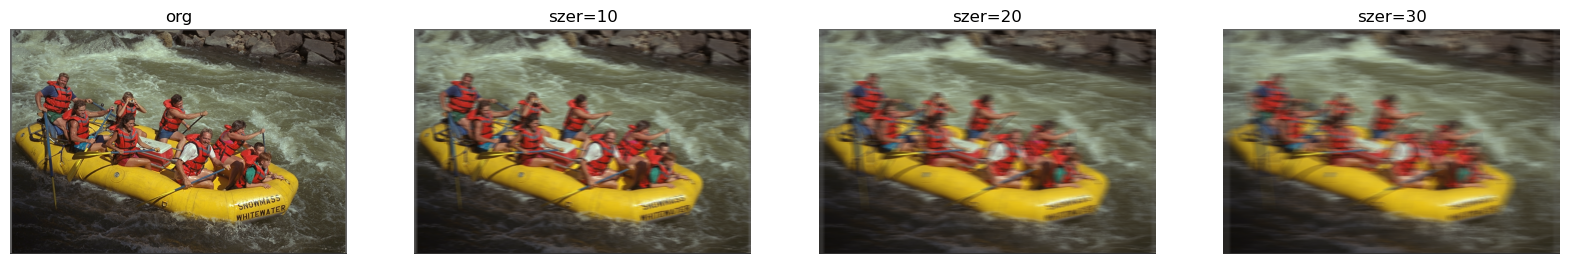

In [8]:
# rozmycie kierunkowe
obr = cv2.imread(main_dir+'kodim14.png')
lio = [obr]
lin = ['org']
for i in range(1,4):
    lio.append(cv2.blur(obr,(i*10,1)))
    lin.append("szer="+str(i*10))
pobr(lio,4,lin)
    

Najpowszechniej stosowanym filtrem rozmywającym jest filtr Gaussa, dla którego wartości elementów maski odpowiadają wartościom rozkładu normalnego z maksimum znajdującym się w punkcie centralnym.

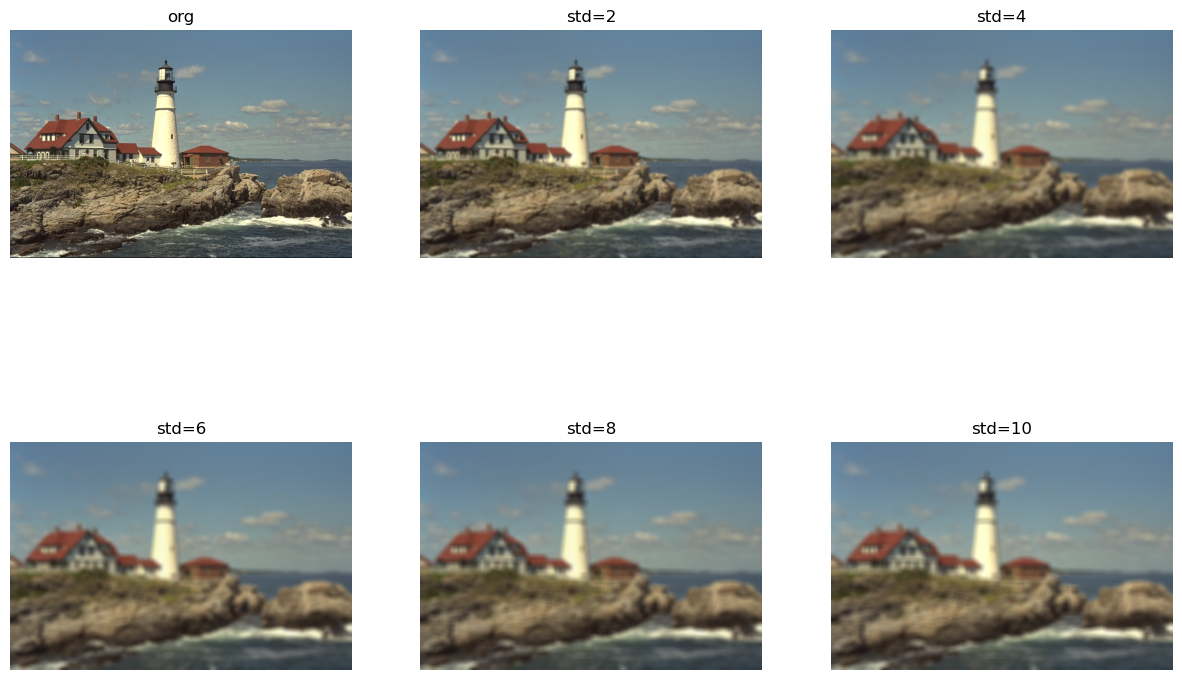

In [10]:
# rozmycie Gausowskie
sasiedztwo = 7
rozmiar_maski = sasiedztwo*2 + 1

obr = cv2.imread('kodim21.png')
lio = [obr]
lin = ['org']
for i in range(1,6):
    lio.append(cv2.GaussianBlur(obr,(rozmiar_maski,rozmiar_maski),i*2))
    lin.append("std="+str(i*2))
pobr(lio,3,lin)

> **Zadanie** Co oznaczają poszczególne paramtery wywołania funkcji `GaussianBlur` ?

> **Zadanie** Sprawdź jak wielkość sąsiedztwa wpływa na wynik filtracji, także dla obrazów o różnych wielkościach.

> **Zadanie** Porównaj wyniki działania filtrów Gausowskiego i uśredniającego o tych samych rozmiarach maski.

## 3. Filtry liniowe górnoprzepustowe

Filtry górnoprzepustowe usuwają z obrazu obszary charakteryzujące się łagodnymi zmianami jasności - odpowiadające harmonicznym sygnału o niskich częstotliwościach. Pozostawiają na obrazie jednocześnie obszary odpowiadające harmonicznym o wysokich częstotliwościach. Są wykorzystywane do wykkrywanie krawędzi.

Filtry Sobela jest wykorzystywany do wykrywania krawędzi w obrazie.

0 255
-878.0 822.0


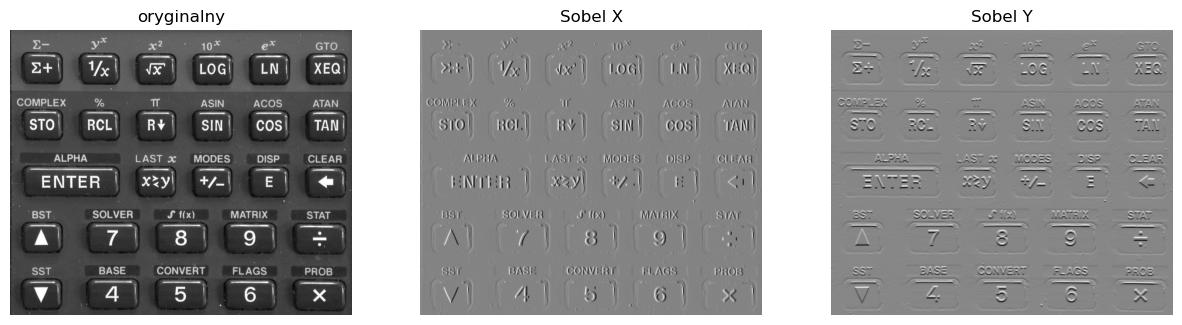

In [11]:
obr = cv2.imread('kalkulator.png',0)
sobelx = cv2.Sobel(obr,cv2.CV_64F,1,0)
sobely = cv2.Sobel(obr,cv2.CV_64F,0,1)
print(np.min(obr),np.max(obr))
print(np.min(sobelx),np.max(sobelx))
pobr([obr,sobelx,sobely],3,['oryginalny','Sobel X','Sobel Y'])

> **Pytanie** Jakiem wartościom obrazu wyjściowego odpowiada szarość charakteryzująca większą część obrazu ?

> **Zadanie** Czym różnią się poszczególne warianty filtra ?

Oba rodzaje gradientu są na ogół w jedną funkcję amplitudy gradientu, co może być wykonane w jeden z dwóch sposobów.

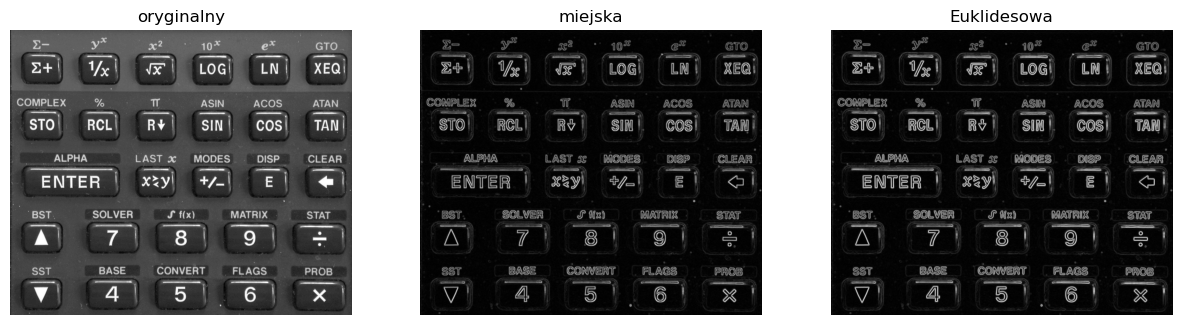

In [12]:
obr = cv2.imread('kalkulator.png',0)
sobelx = cv2.Sobel(obr,cv2.CV_64F,1,0)
sobely = cv2.Sobel(obr,cv2.CV_64F,0,1)
pobr([obr,abs(sobelx) + abs(sobely), np.sqrt(sobelx*sobelx + sobely*sobely)],3,['oryginalny','miejska','Euklidesowa'])

Oprócz istotnych krawędzi, omawiane filtry wykrywają także wszelki szum znajdujący się w obrazie. Pokazuje to poniższy przykład.

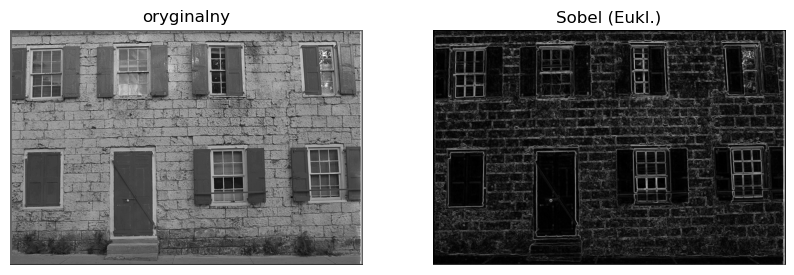

In [13]:
obr = cv2.imread('kodim01.png',0)
sobelx = cv2.Sobel(obr,cv2.CV_64F,1,0)
sobely = cv2.Sobel(obr,cv2.CV_64F,0,1)
gradient = np.sqrt(sobelx*sobelx + sobely*sobely)
pobr([obr,gradient],2,['oryginalny','Sobel (Eukl.)'])

Dlatego często stosowaną kombinacją filtrów jest połączenie filtracji dolnoprzepustowej w celu redukcji szumu, z górnoprzepustową pozwalającą na wykrycie krawędzi. 

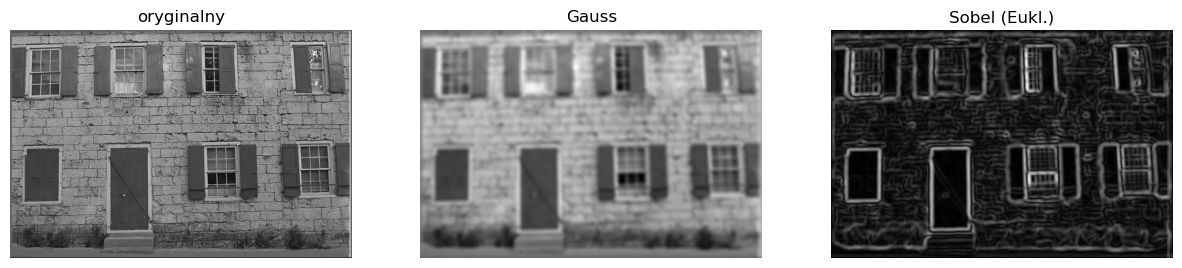

In [14]:
obr = cv2.imread('kodim01.png',0)

rozmycie = 4
sasiedztwo = 7
obr2 = cv2.GaussianBlur(obr,(sasiedztwo*2 + 1,sasiedztwo*2 + 1),rozmycie)

sobelx = cv2.Sobel(obr2,cv2.CV_64F,1,0)
sobely = cv2.Sobel(obr2,cv2.CV_64F,0,1)
gradient = np.sqrt(sobelx*sobelx + sobely*sobely)
pobr([obr,obr2,gradient],3,['oryginalny','Gauss','Sobel (Eukl.)'])

> **Zadanie** Zbadaj, jak stopień rozmycia obrazu wpływa na efekt detekcji krawędzi.

Laplasjan jest estymatorem drugiej pochodnej. Poniższy przykład pokazuje porównanie Laplacjanu z filtrami Sobela. 

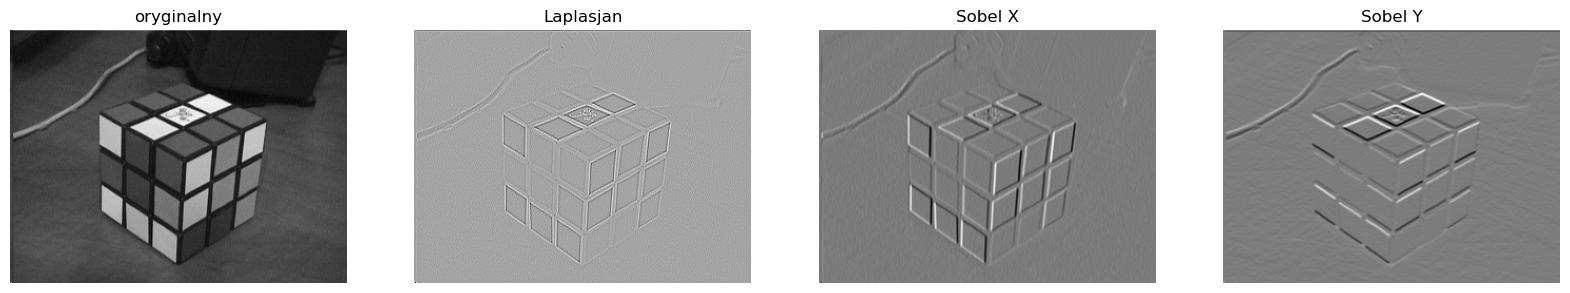

In [15]:
obr = cv2.imread('kostka.bmp',0)
laplacian = cv2.Laplacian(obr,cv2.CV_64F)
sobelx = cv2.Sobel(obr,cv2.CV_64F,1,0)
sobely = cv2.Sobel(obr,cv2.CV_64F,0,1)
pobr([obr,laplacian,sobelx,sobely],4,['oryginalny','Laplasjan','Sobel X','Sobel Y'])

> **Pytanie** Co wykrywa Laplasjan, a co filtr Sobela ?

Laplasjan jest niekiety także poprzedzany filtrem dolnoprzepustowym. Najpopularniejszą kombinacją jest kombinacja Laplacjanu z poprzedzającym go filtrem Gaussa. Filtr taki nosi nazwę filtru LoG (Laplacian-of-Gaussian).

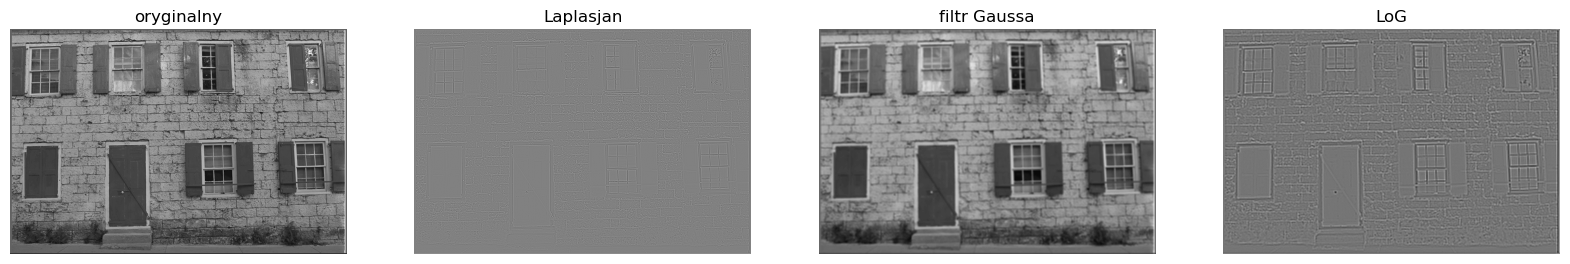

In [16]:
obr = cv2.imread('kodim01.png',0)
sasiedztwo = 2
rozmiar_maski = sasiedztwo*2 + 1
laplacian = cv2.Laplacian(obr,cv2.CV_64F)
gauss = cv2.GaussianBlur(obr,(rozmiar_maski,rozmiar_maski),3)
log = cv2.Laplacian(gauss,cv2.CV_64F)
pobr([obr,laplacian,gauss,log],4,['oryginalny','Laplasjan','filtr Gaussa','LoG'])

Laplasjan jest wykorzystywany także do poprawy kontrastu obrazu.

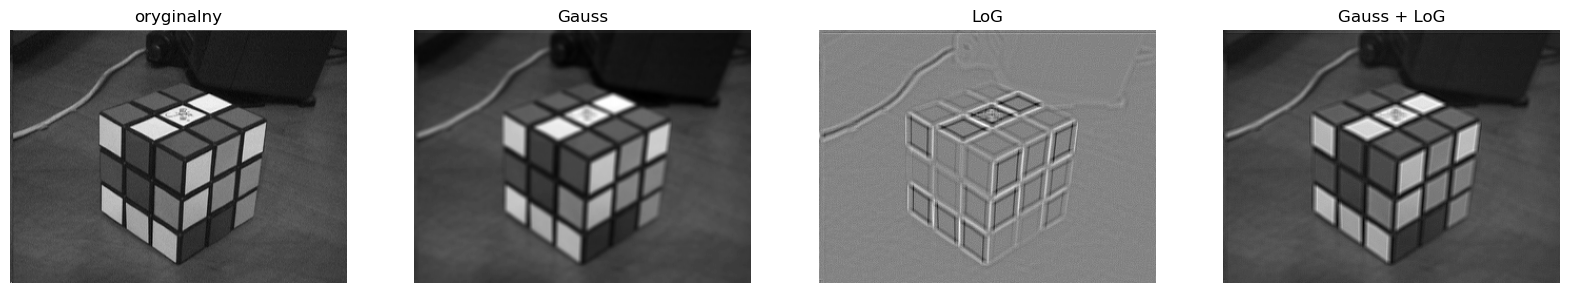

In [17]:
obr = cv2.imread('kostka.bmp',0)
sasiedztwo = 2
rozmiar_maski = sasiedztwo*2 + 1
gauss = cv2.GaussianBlur(obr,(rozmiar_maski,rozmiar_maski),3)
laplacian = cv2.Laplacian(gauss,cv2.CV_64F)
pobr([obr,gauss,laplacian,gauss-laplacian],4,['oryginalny','Gauss','LoG','Gauss + LoG'])

## 4. Filtr medianowy

W filtrze medianowym wyjściowa wartość punktu jest obliczana jako mediana wartosci punktów sasiedztwa. Dla dowolnego zbioru liczb mediane definiujemy jako wartosc srodkowa wyznaczona po uprzednim uporzadkowaniu rosnaco (lub malejaco) tego zbioru. Filtr medianowy zatem nie jest filtrem liniowym tj. wartosc punktu na obrazie wyjsciowym nie jest liniowo zalezna od wartosci punktów na obrazie wejsciowym. 

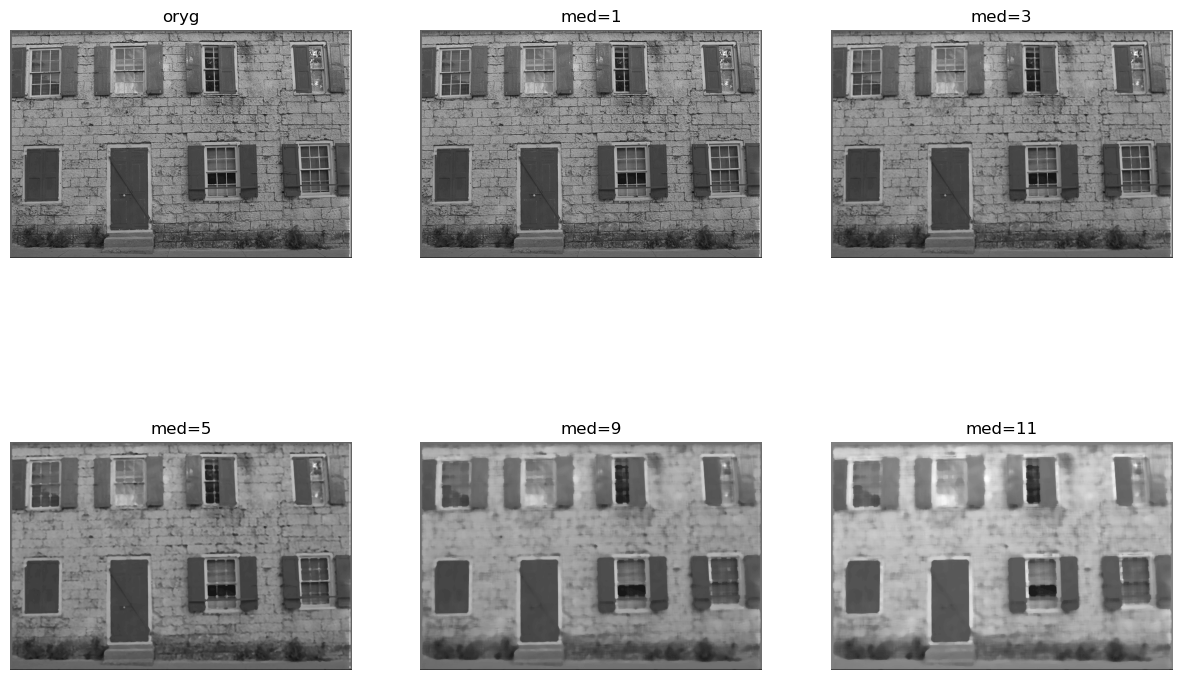

In [18]:
obr = cv2.imread('kodim01.png',0)
lio = [obr]
lin = ['oryg']
rozmiary = [1,3,5,9,11]
for i in range(0,len(rozmiary)):
    lio.append(cv2.medianBlur(obr,rozmiary[i]))
    lin.append("med="+str(rozmiary[i]))
pobr(lio,3,lin)

> **Pytanie** Jak efekt filtracji zalezy od wielkości maski ?

> **Zadanie** Dodaj do obrazu szum typu ''sól i pieprz'' (sprawdź w internecie jak to zrobić), a następnie porównaj działanie filtra medianowego i uśredniającego. 

> **Zadanie** Porównaj działanie filtrów medianowego i uśredniającego o takich samych rozmiarach masek. 

In [19]:
# miejsce na kod


## 5. Operatory i filtry morfologiczne

Operatory morfologiczne **erozja** i **dylacja** (lub **dylatacja**) przypisują pikeslowi obrazu wyjściowego wartość najmniejszą lub największą spośród pikseli sąsiedztwa (opisanego przez tzw. element strukturujący). Kluczową rolę w obu tych operacjach odgrywa forma sąsiedztwa definiowanego z wykorzystaniem **elementu strukturującego**. Na wynik ma wpływ także liczba iteracji danej operacji (krotność)

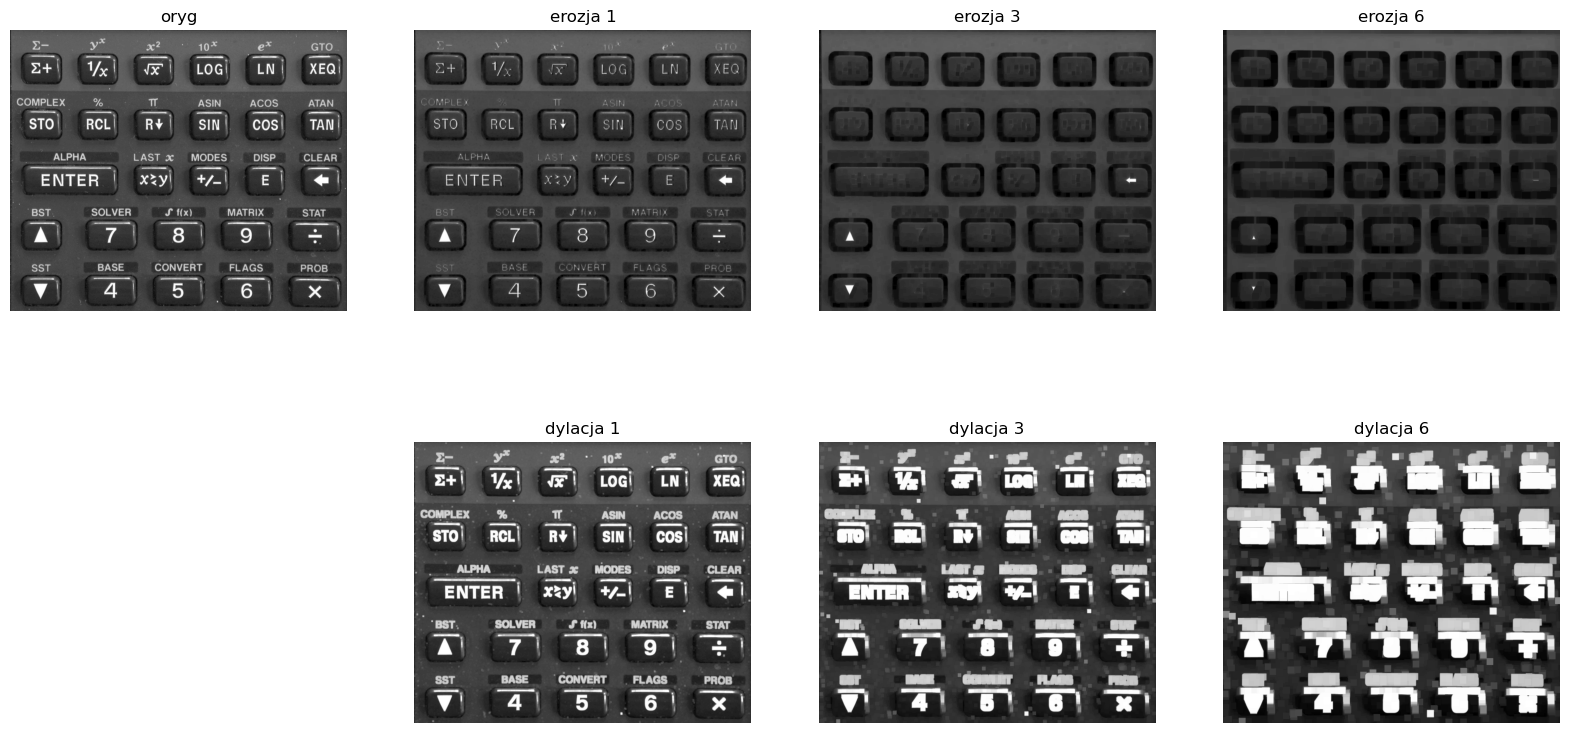

In [20]:
obr = cv2.imread('kalkulator.png',0)
elstr = np.ones((3,3),np.uint8)
lio = [obr]
lin = ['oryg']
iteracji = [1, 3, 6]
# erozje
for i in range(0,3):
    lio.append(cv2.erode(obr,elstr,iterations = iteracji[i]))
    lin.append('erozja '+str(iteracji[i]))
lio.append('')
lin.append('')
# dylacje
for i in range(0,3):
    lio.append(cv2.dilate(obr,elstr,iterations = iteracji[i]))
    lin.append('dylacja '+str(iteracji[i]))
pobr(lio,4,lin)

> **Pytanie** Jak liczba iteracji wpływa na wynik operacji ? Jak liczbę iteracj można odnieść do elementu strukturującego ?

> **Zadanie** W jaki inny sposób można osiągnąć efekt identyczny do uzyskanego przez zwiększenie liczby iteracji ? Wykonaj stosowne eksperymenty.

Kolejno wykonując erozję, a następnie na wyniku - **dylację** otrzymujemy filtr **otwarcia**. Wykonując operacje w odwrotnej kolejności otrzymamy filtr typu **zamknięcie**. Pierwszy z nich usuwa szum typu ''sól'', drugi - typu ''pieprz''

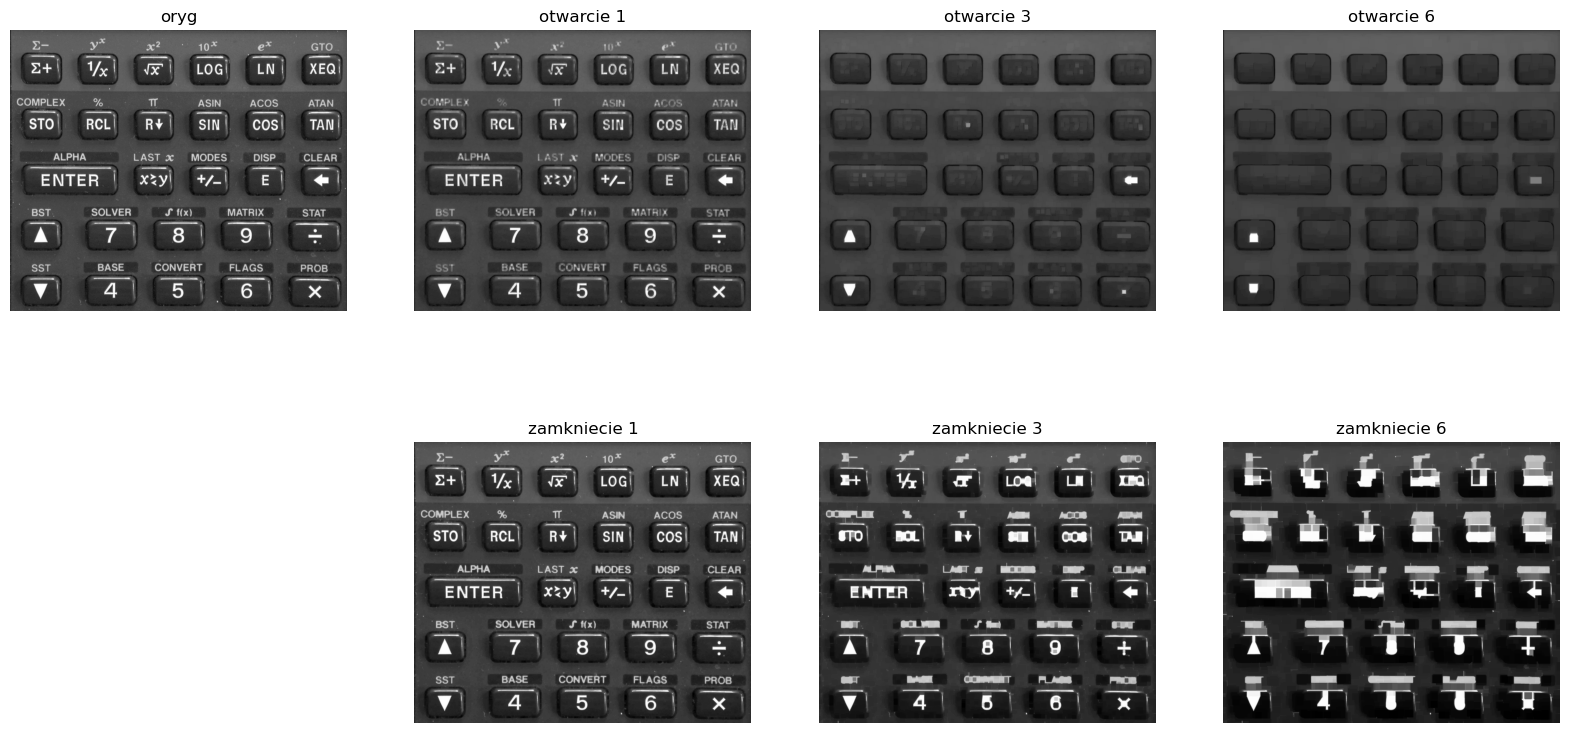

In [21]:
obr = cv2.imread('kalkulator.png',0)
lio = [obr]
lin = ['oryg']
rozmiary = [1, 3, 6]
# erozje
for i in range(0,3):
    elstr = np.ones((2*rozmiary[i]+1,2*rozmiary[i]+1),np.uint8)
    lio.append(cv2.morphologyEx(obr,cv2.MORPH_OPEN,elstr))
    lin.append('otwarcie '+str(rozmiary[i]))
lio.append('')
lin.append('')
# dylacje
for i in range(0,3):
    elstr = np.ones((2*rozmiary[i]+1,2*rozmiary[i]+1),np.uint8)
    lio.append(cv2.morphologyEx(obr,cv2.MORPH_CLOSE,elstr))
    lin.append('zamkniecie '+str(rozmiary[i]))
pobr(lio,4,lin)

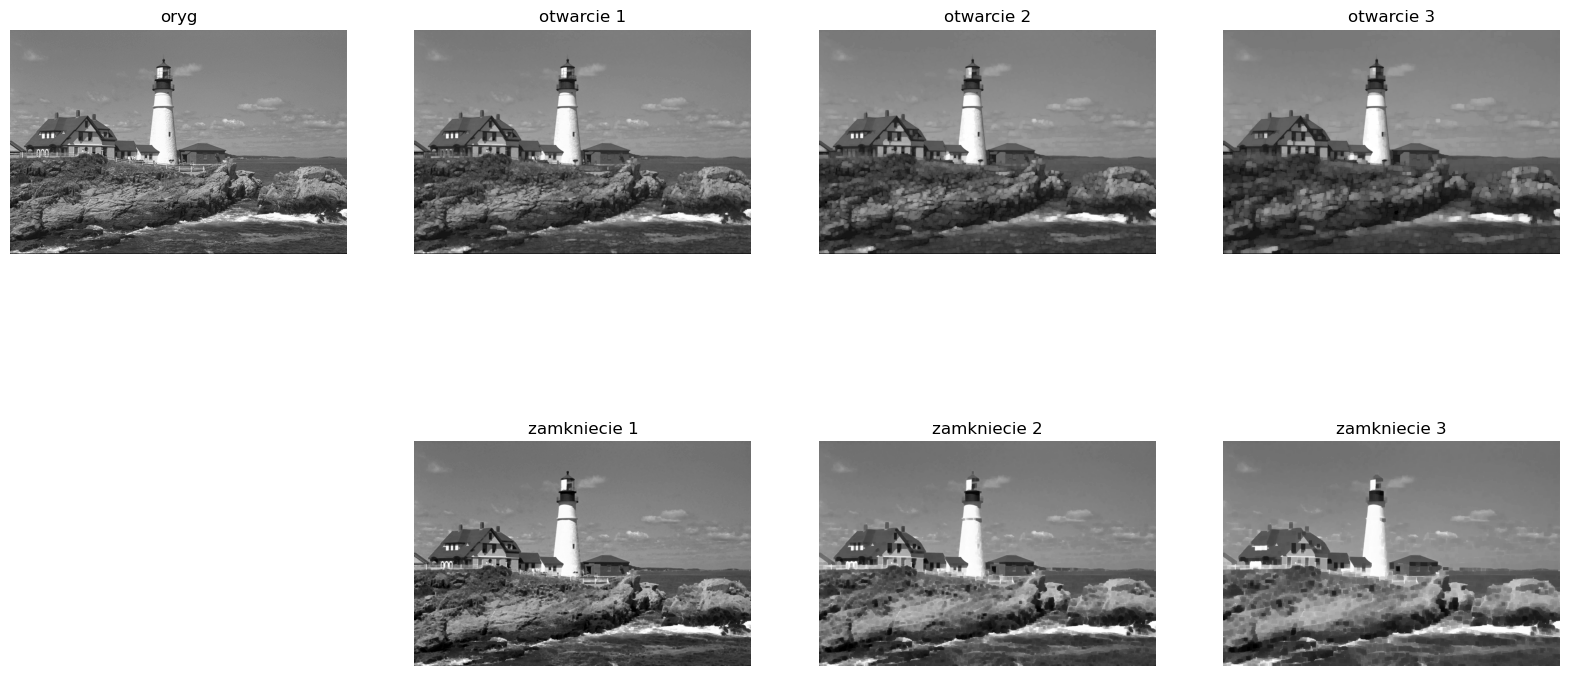

In [22]:
obr = cv2.imread('kodim21.png',0)
lio = [obr]
lin = ['oryg']
for i in range(1,4):
    elstr = np.ones((2*i+1,2*i+1),np.uint8)
    lio.append(cv2.morphologyEx(obr,cv2.MORPH_OPEN,elstr))
    lin.append('otwarcie '+str(i))
lio.append('')
lin.append('')
for i in range(1,4):
    elstr = np.ones((2*i+1,2*i+1),np.uint8)
    lio.append(cv2.morphologyEx(obr,cv2.MORPH_CLOSE,elstr))
    lin.append('zamkniecie '+str(i))
pobr(lio,4,lin)

Detekcja szczytów polega na odjęciu od obrazu oryginalnego wyniku otwarcia. 

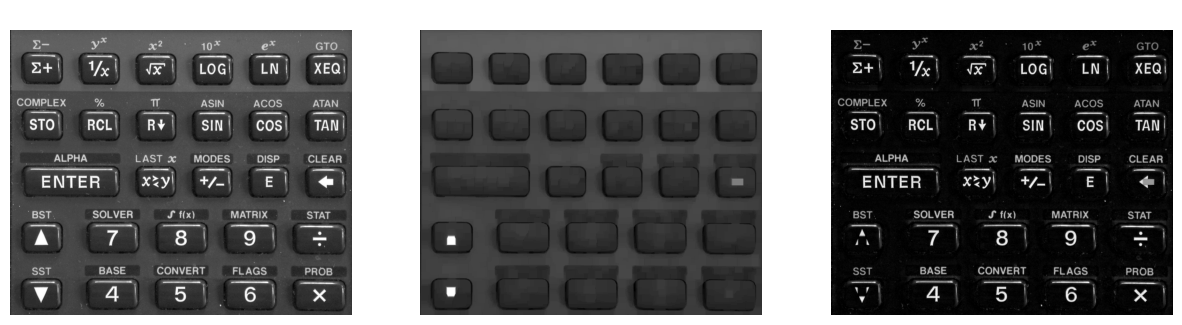

In [23]:
obr = cv2.imread('kalkulator.png',0)
rozmiar = 13
elstr = np.ones((rozmiar,rozmiar),np.uint8)
otwarcie = cv2.morphologyEx(obr,cv2.MORPH_OPEN,elstr)
pobr([obr, otwarcie, obr-otwarcie],3)

Filtry otwarcia i zamknięcia są wykorzystywane do usuwania elementów jaśniejszych i ciemniejszych od tła. Poniższy przykład pokazuje zastosowanie tego typu filtrów do filtracji maski, która została wyodrębniona w efekcie segmentacji przez progowanie. Maska obejmuje obszar obrazu oryginalnego o charakterstycznym kolorze oraz pojedyncze piksele jasne poza tym obszarem oraz ciemne wewnątrz. Dzięki filtracji morfologicznej, piksele te są usuwane.  

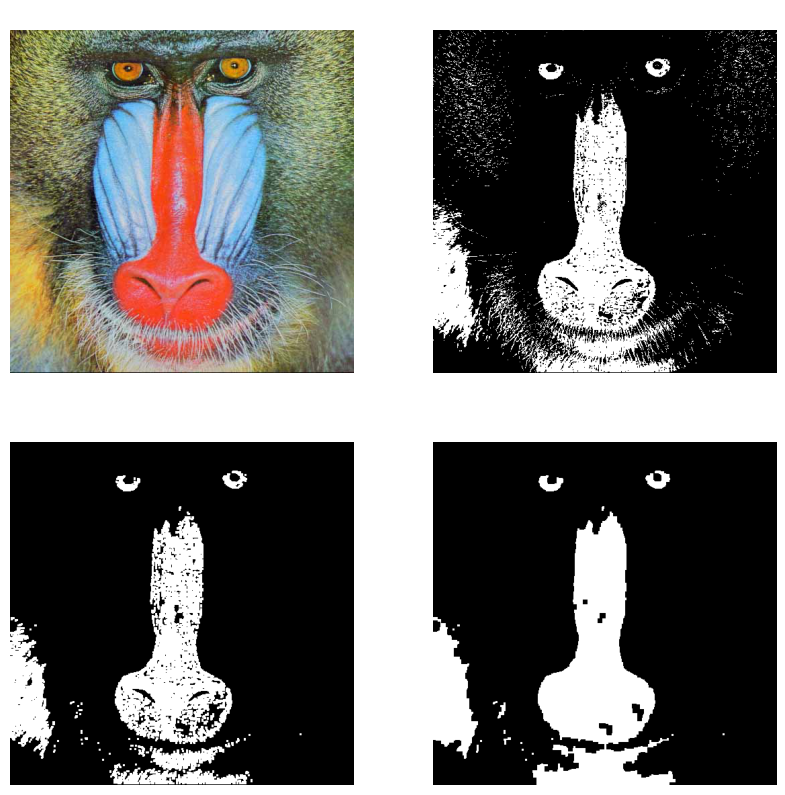

In [24]:
obr = cv2.imread('baboon.jpg')
dol = (0,0,180)
gora = (200,200,250)
bin = cv2.inRange(obr, dol, gora)
binfilt1 = cv2.morphologyEx(bin,cv2.MORPH_OPEN,np.ones((3,3),np.uint8))
binfilt2 = cv2.morphologyEx(binfilt1,cv2.MORPH_CLOSE,np.ones((7,7),np.uint8))
pobr([obr,bin,binfilt1,binfilt2],2)

> **Zadanie** Poeksperymentuj w powyższym przykładzie z różnymi wartościami parametrów - zarówno segmentacji koloru jak i elementów strukturujących.

> **Zadanie** Sprawdź jakie są i jak należy stosować odpowiedniki omówionych komend realizujących kontekstowe metody przetwarzania obrazów w pakiecie `scikit-image`

## Dla dociekliwych

* https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
* https://www.youtube.com/watch?v=xSzsD4kXhRw

---
---
Historia zmian:
* wersja pierwotna r.akad 19/20: 16.04.2020 (MI)